***importing libraries:***

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import numpy as np

***Specify the file path:***

In [393]:
corp_production_prediction_file_path = "C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/FAOSTAT_data.xlsx"

In [394]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

***Read the sheet file:***

In [395]:
excel_data = pd.read_excel(corp_production_prediction_file_path)
excel_data.head()

Domain Code                        Domain  Area Code (M49)         Area  \
0         QCL  Crops and livestock products                4  Afghanistan   
1         QCL  Crops and livestock products                4  Afghanistan   
2         QCL  Crops and livestock products                4  Afghanistan   
3         QCL  Crops and livestock products                4  Afghanistan   
4         QCL  Crops and livestock products                4  Afghanistan   

   Element Code         Element Item Code (CPC)               Item  Year Code  \
0          5312  Area harvested            1371  Almonds, in shell       2019   
1          5412           Yield            1371  Almonds, in shell       2019   
2          5510      Production            1371  Almonds, in shell       2019   
3          5312  Area harvested            1371  Almonds, in shell       2020   
4          5412           Yield            1371  Almonds, in shell       2020   

   Year   Unit    Value Flag Flag Description Note  
0  2019     ha  29203.0    A  Official figure  NaN  
1  2019  kg/ha   1308.3    A  Official figure  NaN  
2  2019      t  38205.0    A  Official figure  NaN  
3  2020     ha  22134.0    A  Official figure  NaN  
4  2020  kg/ha   1775.9    A  Official figure  NaN

***Saving the cpp DataSet file:***

In [396]:
# Create the directory if it doesn't exist
output_dir = 'C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/DataSet'
os.makedirs(output_dir, exist_ok=True)

# Now save the file
excel_data.to_csv(os.path.join(output_dir, 'UnCleaned_Corp_Production_Prediction_DataSet.csv'), index=False)

## **Data Transformation**

***Read the cpp csv file:***

In [397]:
cpp = pd.read_csv("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/DataSet/UnCleaned_Corp_Production_Prediction_DataSet.csv")
cpp.head()

Domain Code                        Domain  Area Code (M49)         Area  \
0         QCL  Crops and livestock products                4  Afghanistan   
1         QCL  Crops and livestock products                4  Afghanistan   
2         QCL  Crops and livestock products                4  Afghanistan   
3         QCL  Crops and livestock products                4  Afghanistan   
4         QCL  Crops and livestock products                4  Afghanistan   

   Element Code         Element Item Code (CPC)               Item  Year Code  \
0          5312  Area harvested            1371  Almonds, in shell       2019   
1          5412           Yield            1371  Almonds, in shell       2019   
2          5510      Production            1371  Almonds, in shell       2019   
3          5312  Area harvested            1371  Almonds, in shell       2020   
4          5412           Yield            1371  Almonds, in shell       2020   

   Year   Unit    Value Flag Flag Description Note  
0  2019     ha  29203.0    A  Official figure  NaN  
1  2019  kg/ha   1308.3    A  Official figure  NaN  
2  2019      t  38205.0    A  Official figure  NaN  
3  2020     ha  22134.0    A  Official figure  NaN  
4  2020  kg/ha   1775.9    A  Official figure  NaN

***cpp dataset information:***

In [398]:
cpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224647 entries, 0 to 224646
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       224647 non-null  object 
 1   Domain            224647 non-null  object 
 2   Area Code (M49)   224647 non-null  int64  
 3   Area              224647 non-null  object 
 4   Element Code      224647 non-null  int64  
 5   Element           224647 non-null  object 
 6   Item Code (CPC)   224642 non-null  object 
 7   Item              224647 non-null  object 
 8   Year Code         224647 non-null  int64  
 9   Year              224647 non-null  int64  
 10  Unit              224645 non-null  object 
 11  Value             218130 non-null  float64
 12  Flag              224643 non-null  object 
 13  Flag Description  224634 non-null  object 
 14  Note              5098 non-null    object 
dtypes: float64(1), int64(4), object(10)
memory usage: 25.7+ MB


***Fetching the column heading names:***

In [399]:
cpp.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')

***Dropping non-related features***

In [400]:
cpp = cpp.drop(columns=['Domain Code','Domain','Area Code (M49)','Element Code','Item Code (CPC)','Year Code','Flag', 'Flag Description', 'Note'])

In [401]:
cpp.head()

Area         Element               Item  Year   Unit    Value
0  Afghanistan  Area harvested  Almonds, in shell  2019     ha  29203.0
1  Afghanistan           Yield  Almonds, in shell  2019  kg/ha   1308.3
2  Afghanistan      Production  Almonds, in shell  2019      t  38205.0
3  Afghanistan  Area harvested  Almonds, in shell  2020     ha  22134.0
4  Afghanistan           Yield  Almonds, in shell  2020  kg/ha   1775.9

***Statistical Records:***

In [402]:
cpp.describe()

Year         Value
count  224647.000000  2.181300e+05
mean     2020.971658  8.984848e+05
std         1.403592  1.201902e+07
min      2019.000000  0.000000e+00
25%      2020.000000  9.370000e+02
50%      2021.000000  7.228200e+03
75%      2022.000000  5.135000e+04
max      2023.000000  7.825858e+08

In [403]:
cpp.describe(include=object)

Area     Element                      Item    Unit
count   224647      224647                    224647  224645
unique     200           8                       276      11
top      China  Production  Hen eggs in shell, fresh       t
freq      2640       86382                      4546   85254

***Unique Values:***

In [404]:
cpp['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "C�te d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eston

In [405]:
cpp['Item'].unique()

array(['Almonds, in shell',
       'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
       'Apples', 'Apricots', 'Asses', 'Barley',
       'Butter and ghee of sheep milk', 'Butter of cow milk',
       'Buttermilk, dry', 'Camels', 'Cantaloupes and other melons',
       'Cattle', 'Cattle fat, unrendered',
       'Cheese from milk of goats, fresh or processed',
       'Cheese from milk of sheep, fresh or processed', 'Chickens',
       'Cotton lint, ginned', 'Cotton seed', 'Cottonseed oil',
       'Edible offal of cattle, fresh, chilled or frozen',
       'Edible offal of goat, fresh, chilled or frozen',
       'Edible offal of sheep, fresh, chilled or frozen',
       'Edible offals of camels and other camelids, fresh, chilled or frozen',
       'Fat of camels', 'Figs', 'Game meat, fresh, chilled or frozen',
       'Goat fat, unrendered', 'Goats', 'Grapes',
       'Hen eggs in shell, fresh', 'Horses', 'Linseed', 'Maize (corn)',
       'Meat of camels, fresh or c

In [406]:
cpp['Element'].unique()

array(['Area harvested', 'Yield', 'Production', 'Stocks',
       'Producing Animals/Slaughtered', 'Laying', 'Yield/Carcass Weight',
       'Milk Animals'], dtype=object)

In [407]:
cpp['Year'].unique()

array([2019, 2020, 2021, 2022, 2023])

In [408]:
cpp['Unit'].unique()

array(['ha', 'kg/ha', 't', 'An', '1000 An', '100 mg/An', 'No/An',
       '1000 No', nan, '100 g/An', '0.1 g/An', 'No'], dtype=object)

In [409]:
cpp.groupby('Element')['Unit'].unique()

#Unit: Unit of measurement (e.g., Area harvested -> ha for hectares, Yield -> kg/ha for yield, Production -> t(tons) for production).

Element
Area harvested                                                       [ha]
Laying                                                          [1000 An]
Milk Animals                                                         [An]
Producing Animals/Slaughtered                               [An, 1000 An]
Production                                              [t, 1000 No, nan]
Stocks                                                  [An, 1000 An, No]
Yield                            [kg/ha, 100 mg/An, No/An, nan, 100 g/An]
Yield/Carcass Weight                                 [100 g/An, 0.1 g/An]
Name: Unit, dtype: object

***pivot table***

In [410]:
cpp = cpp.pivot_table(
    index=['Area', 'Item', 'Year'],
    columns='Element',
    values='Value',
    aggfunc='first'
).reset_index()

cpp.head()

Element         Area               Item  Year  Area harvested  Laying  \
0        Afghanistan  Almonds, in shell  2019         29203.0     NaN   
1        Afghanistan  Almonds, in shell  2020         22134.0     NaN   
2        Afghanistan  Almonds, in shell  2021         36862.0     NaN   
3        Afghanistan  Almonds, in shell  2022         36462.0     NaN   
4        Afghanistan  Almonds, in shell  2023         37000.0     NaN   

Element  Milk Animals  Producing Animals/Slaughtered  Production  Stocks  \
0                 NaN                            NaN     38205.0     NaN   
1                 NaN                            NaN     39307.0     NaN   
2                 NaN                            NaN     64256.0     NaN   
3                 NaN                            NaN     63515.0     NaN   
4                 NaN                            NaN     67000.0     NaN   

Element   Yield  Yield/Carcass Weight  
0        1308.3                   NaN  
1        1775.9                   NaN  
2        1743.2                   NaN  
3        1742.0                   NaN  
4        1810.8                   NaN

***Renaming the Column Names:***

In [411]:
#Unit: Unit of measurement (e.g., Area harvested -> ha for hectares, Yield -> kg/ha for yield, Production -> t(tons) for production).

In [412]:
cpp = cpp.rename(columns={
    'Area': 'Country',
    'Area harvested': 'Area harvested (ha)',
    'Yield': 'Yield (kg/ha)',
    'Production': 'Production (t)'
})
cpp.head()

Element      Country               Item  Year  Area harvested (ha)  Laying  \
0        Afghanistan  Almonds, in shell  2019              29203.0     NaN   
1        Afghanistan  Almonds, in shell  2020              22134.0     NaN   
2        Afghanistan  Almonds, in shell  2021              36862.0     NaN   
3        Afghanistan  Almonds, in shell  2022              36462.0     NaN   
4        Afghanistan  Almonds, in shell  2023              37000.0     NaN   

Element  Milk Animals  Producing Animals/Slaughtered  Production (t)  Stocks  \
0                 NaN                            NaN         38205.0     NaN   
1                 NaN                            NaN         39307.0     NaN   
2                 NaN                            NaN         64256.0     NaN   
3                 NaN                            NaN         63515.0     NaN   
4                 NaN                            NaN         67000.0     NaN   

Element  Yield (kg/ha)  Yield/Carcass Weight  
0               1308.3                   NaN  
1               1775.9                   NaN  
2               1743.2                   NaN  
3               1742.0                   NaN  
4               1810.8                   NaN

***Fetching only specific Columns:***

In [413]:
cpp = cpp[['Country','Item','Year','Area harvested (ha)','Yield (kg/ha)','Production (t)']]
cpp.head()

Element      Country               Item  Year  Area harvested (ha)  \
0        Afghanistan  Almonds, in shell  2019              29203.0   
1        Afghanistan  Almonds, in shell  2020              22134.0   
2        Afghanistan  Almonds, in shell  2021              36862.0   
3        Afghanistan  Almonds, in shell  2022              36462.0   
4        Afghanistan  Almonds, in shell  2023              37000.0   

Element  Yield (kg/ha)  Production (t)  
0               1308.3         38205.0  
1               1775.9         39307.0  
2               1743.2         64256.0  
3               1742.0         63515.0  
4               1810.8         67000.0

***Rows & Columns***:

In [414]:
cpp.shape

(92422, 6)

***Saving the cpp DataSet file:***

In [415]:
# Create the directory if it doesn't exist
output_dir = 'C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/DataSet'
os.makedirs(output_dir, exist_ok=True)

# Now save the file
cpp.to_csv(os.path.join(output_dir, 'Pre_Processed_Cleaned_Corp_Production_Prediction_DataSet.csv'), index=False)

***Reading the cleaned cpp csv file:***

In [416]:
cpp = pd.read_csv("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/DataSet/Pre_Processed_Cleaned_Corp_Production_Prediction_DataSet.csv")
cpp.head()

Country               Item  Year  Area harvested (ha)  Yield (kg/ha)  \
0  Afghanistan  Almonds, in shell  2019              29203.0         1308.3   
1  Afghanistan  Almonds, in shell  2020              22134.0         1775.9   
2  Afghanistan  Almonds, in shell  2021              36862.0         1743.2   
3  Afghanistan  Almonds, in shell  2022              36462.0         1742.0   
4  Afghanistan  Almonds, in shell  2023              37000.0         1810.8   

   Production (t)  
0         38205.0  
1         39307.0  
2         64256.0  
3         63515.0  
4         67000.0

***Information***

## **Data Cleaning:**

In [417]:
cpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92422 entries, 0 to 92421
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              92422 non-null  object 
 1   Item                 92422 non-null  object 
 2   Year                 92422 non-null  int64  
 3   Area harvested (ha)  47901 non-null  float64
 4   Yield (kg/ha)        50573 non-null  float64
 5   Production (t)       81944 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.2+ MB


***Validate Data Types***

In [418]:
cpp.dtypes

Country                 object
Item                    object
Year                     int64
Area harvested (ha)    float64
Yield (kg/ha)          float64
Production (t)         float64
dtype: object

***Verifying for null values***

In [419]:
cpp.isnull().sum()

Country                    0
Item                       0
Year                       0
Area harvested (ha)    44521
Yield (kg/ha)          41849
Production (t)         10478
dtype: int64

### data filling => data imputation

- ***1.Replacing the nan values in Area harvested (ha):***

   - - Verifying mean, median, mode:

In [420]:
cpp['Area harvested (ha)'].mean()

np.float64(171281.03645017848)

In [421]:
cpp['Area harvested (ha)'].median()

np.float64(3005.0)

In [422]:
cpp['Area harvested (ha)'].mode()

0    0.0
Name: Area harvested (ha), dtype: float64

- - value_counts:

In [423]:
cpp['Area harvested (ha)'].value_counts(dropna=False)

Area harvested (ha)
NaN           44521
0.0            2886
10.0            261
1.0             211
20.0            178
100.0           151
40.0            144
50.0            136
4.0             127
5.0             125
2.0             124
30.0            123
200.0           111
60.0            106
8.0             103
3.0             102
6.0              97
90.0             94
70.0             91
110.0            90
80.0             87
7.0              87
130.0            86
9.0              80
120.0            75
140.0            73
1000.0           72
12.0             72
16.0             72
35.0             70
160.0            69
210.0            67
180.0            67
17.0             67
21.0             66
26.0             65
11.0             65
190.0            64
300.0            64
24.0             64
25.0             63
19.0             60
170.0            60
400.0            59
14.0             59
220.0            58
150.0            58
15.0             57
34.0             55


- - filling null values:

In [424]:
cpp['Area harvested (ha)'].fillna(cpp['Area harvested (ha)'].median(), inplace=True)

C:\Users\dhars\AppData\Local\Temp\ipykernel_28412\3723329357.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cpp['Area harvested (ha)'].fillna(cpp['Area harvested (ha)'].median(), inplace=True)


   - - Verifying mean, median, mode after filling null values:

In [425]:
mean_cpp = cpp['Area harvested (ha)'].mean()
median_cpp = cpp['Area harvested (ha)'].median()
mode_cpp = cpp['Area harvested (ha)'].mode()[0]

print(f'mean: {mean_cpp},\n median: {median_cpp},\n mode: {mode_cpp}')

mean: 90220.06158706802,
 median: 3005.0,
 mode: 3005.0


***Verifying for null values***

In [426]:
cpp.isnull().sum()

Country                    0
Item                       0
Year                       0
Area harvested (ha)        0
Yield (kg/ha)          41849
Production (t)         10478
dtype: int64

- ***2.Replacing the nan values in Yield (kg/ha):***

   - - Verifying mean, median, mode:

In [427]:
mean_cpp = cpp['Yield (kg/ha)'].mean()
median_cpp = cpp['Yield (kg/ha)'].median()
mode_cpp = cpp['Yield (kg/ha)'].mode()[0]

print(f'mean: {mean_cpp},\n median: {median_cpp},\n mode: {mode_cpp}')

mean: 13556.779050086014,
 median: 5463.8,
 mode: 1000.0


- - value_counts:

In [428]:
cpp['Yield (kg/ha)'].value_counts(dropna=False)

Yield (kg/ha)
NaN         41849
1000.0        170
25.0          122
20.0          113
2000.0         82
3000.0         72
30.0           67
21.0           66
22.0           60
26.0           60
24.0           60
29.0           58
4000.0         56
28.0           49
23.0           48
5000.0         48
27.0           47
20000.0        46
19.0           44
18.0           41
6000.0         41
2500.0         39
38.0           35
12000.0        35
1500.0         35
14.0           34
7000.0         34
10000.0        33
33.0           32
15000.0        31
36.0           31
12.0           31
32.0           30
8000.0         29
31.0           29
1666.7         28
25000.0        27
200.0          26
11000.0        26
333.3          25
30000.0        24
37.0           24
0.0            24
500.0          24
15.0           23
17.0           23
666.7          22
35.0           22
34.0           22
16.0           21
3500.0         20
39.0           20
40000.0        19
45.0           18
4500.0        

- - filling null values:

In [429]:
cpp['Yield (kg/ha)'].fillna(cpp['Yield (kg/ha)'].median(), inplace=True)

C:\Users\dhars\AppData\Local\Temp\ipykernel_28412\2661878380.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cpp['Yield (kg/ha)'].fillna(cpp['Yield (kg/ha)'].median(), inplace=True)


   - - Verifying mean, median, mode after filling null values:

In [430]:
mean_cpp = cpp['Yield (kg/ha)'].mean()
median_cpp = cpp['Yield (kg/ha)'].median()
mode_cpp = cpp['Yield (kg/ha)'].mode()[0]

print(f'mean: {mean_cpp},\n median: {median_cpp},\n mode: {mode_cpp}')

mean: 9892.25025535046,
 median: 5463.8,
 mode: 5463.8


***Verifying for null values***

In [431]:
cpp.isnull().sum()

Country                    0
Item                       0
Year                       0
Area harvested (ha)        0
Yield (kg/ha)              0
Production (t)         10478
dtype: int64

- ***3.Replacing the nan values in Production (t):***

   - - Verifying mean, median, mode:

In [432]:
mean_cpp = cpp['Production (t)'].mean()
median_cpp = cpp['Production (t)'].median()
mode_cpp = cpp['Production (t)'].mode()[0]

print(f'mean: {mean_cpp},\n median: {median_cpp},\n mode: {mode_cpp}')

mean: 849891.5435088598,
 median: 10427.585,
 mode: 0.0


- - value_counts:

In [433]:
cpp['Production (t)'].value_counts(dropna=False)

Production (t)
NaN             10478
0.000000e+00     3578
1.000000e+01      118
1.000000e+03      108
1.000000e+02      100
5.000000e+02       78
2.000000e+01       77
2.000000e+03       76
2.000000e+02       74
3.000000e+03       70
1.200000e+03       69
5.000000e+01       63
1.000000e+04       59
4.000000e+03       59
5.000000e+03       55
4.000000e+01       54
3.000000e+02       53
6.000000e+03       52
6.000000e+01       52
4.000000e+02       50
3.000000e+01       50
1.800000e+04       48
8.000000e+03       48
1.500000e+04       47
2.500000e+04       46
6.000000e+02       45
1.800000e+02       45
3.000000e+04       44
8.000000e+02       44
8.000000e+01       44
7.000000e+01       44
1.000000e+00       42
1.100000e+03       41
2.000000e+04       40
7.000000e+03       40
2.500000e+03       39
1.300000e+02       39
1.200000e+04       39
7.000000e+02       39
2.400000e+03       38
1.500000e+03       37
1.900000e+02       37
1.300000e+03       37
4.800000e+03       37
1.400000e+04     

- - filling null values:

In [434]:
cpp['Production (t)'].fillna(cpp['Production (t)'].median(), inplace=True)

C:\Users\dhars\AppData\Local\Temp\ipykernel_28412\1774883731.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cpp['Production (t)'].fillna(cpp['Production (t)'].median(), inplace=True)


   - - Verifying mean, median, mode after filling null values:

In [435]:
mean_cpp = cpp['Production (t)'].mean()
median_cpp = cpp['Production (t)'].median()
mode_cpp = cpp['Production (t)'].mode()[0]

print(f'mean: {mean_cpp},\n median: {median_cpp},\n mode: {mode_cpp}')

mean: 754720.4440167925,
 median: 10427.585,
 mode: 10427.585


***Verifying for null values***

In [436]:
cpp.isnull().sum()

Country                0
Item                   0
Year                   0
Area harvested (ha)    0
Yield (kg/ha)          0
Production (t)         0
dtype: int64

***Checking for duplicates***

In [437]:
cpp.duplicated().sum()

np.int64(0)

***Rows & Columns***:

In [438]:
cpp.shape

(92422, 6)

***Saving the cpp DataSet file:***

In [ ]:
# Create the directory if it doesn't exist
output_dir = 'C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/DataSet'
os.makedirs(output_dir, exist_ok=True)

# Now save the file
cpp.to_csv(os.path.join(output_dir, 'Cleaned_Corp_Production_Prediction_DataSet.csv'), index=False)

***Reading the Pre-Processed cleaned cpp csv file:***

In [4]:
cpp = pd.read_csv("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/DataSet/Cleaned_Corp_Production_Prediction_DataSet.csv")
cpp.head()

Country               Item  Year  Area harvested (ha)  Yield (kg/ha)  \
0  Afghanistan  Almonds, in shell  2019              29203.0         1308.3   
1  Afghanistan  Almonds, in shell  2020              22134.0         1775.9   
2  Afghanistan  Almonds, in shell  2021              36862.0         1743.2   
3  Afghanistan  Almonds, in shell  2022              36462.0         1742.0   
4  Afghanistan  Almonds, in shell  2023              37000.0         1810.8   

   Production (t)  
0         38205.0  
1         39307.0  
2         64256.0  
3         63515.0  
4         67000.0

***Information***

In [5]:
cpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92422 entries, 0 to 92421
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              92422 non-null  object 
 1   Item                 92422 non-null  object 
 2   Year                 92422 non-null  int64  
 3   Area harvested (ha)  92422 non-null  float64
 4   Yield (kg/ha)        92422 non-null  float64
 5   Production (t)       92422 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.2+ MB


***Validate Data Types***

In [6]:
cpp.dtypes

Country                 object
Item                    object
Year                     int64
Area harvested (ha)    float64
Yield (kg/ha)          float64
Production (t)         float64
dtype: object

In [7]:
cpp.head()

Country               Item  Year  Area harvested (ha)  Yield (kg/ha)  \
0  Afghanistan  Almonds, in shell  2019              29203.0         1308.3   
1  Afghanistan  Almonds, in shell  2020              22134.0         1775.9   
2  Afghanistan  Almonds, in shell  2021              36862.0         1743.2   
3  Afghanistan  Almonds, in shell  2022              36462.0         1742.0   
4  Afghanistan  Almonds, in shell  2023              37000.0         1810.8   

   Production (t)  
0         38205.0  
1         39307.0  
2         64256.0  
3         63515.0  
4         67000.0

## **Data Handling:**

Checking for outliers:

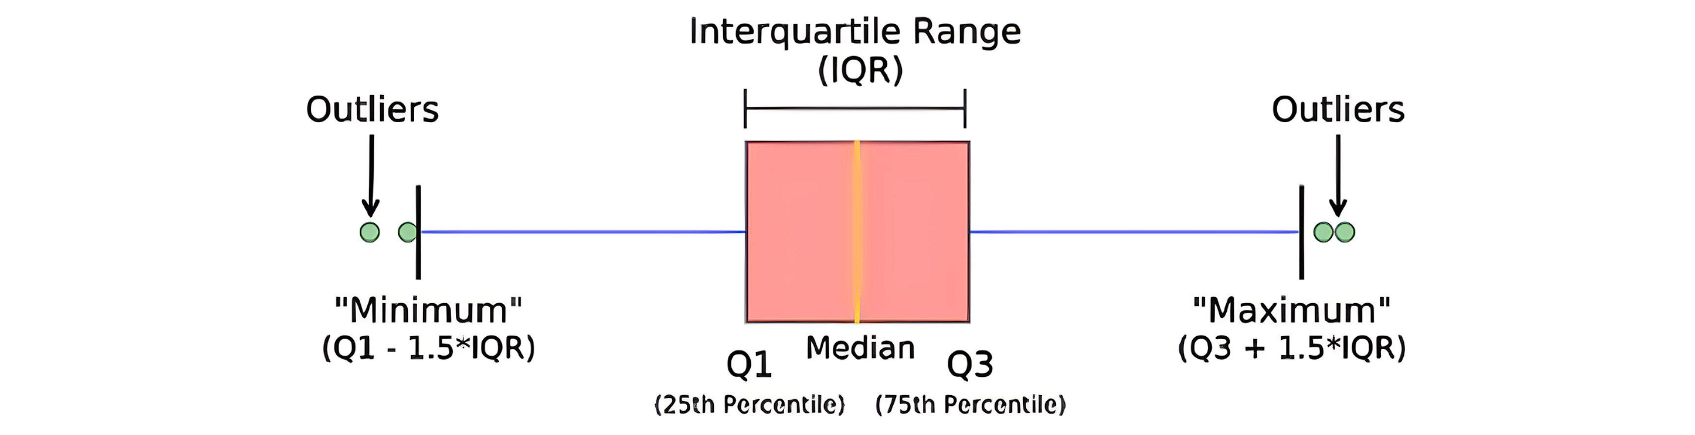

In [8]:
cpp_outliers = cpp[['Year','Area harvested (ha)', 'Production (t)']]
cpp_outliers.head()

Year  Area harvested (ha)  Production (t)
0  2019              29203.0         38205.0
1  2020              22134.0         39307.0
2  2021              36862.0         64256.0
3  2022              36462.0         63515.0
4  2023              37000.0         67000.0

Finding quantile Values & Inter Quaratile Range Values:

For Area harvested (ha) 

In [9]:
Q1_ha = cpp_outliers['Area harvested (ha)'].quantile(0.25)
Q3_ha = cpp_outliers['Area harvested (ha)'].quantile(0.75)

print(f'Area harvested (ha) for Q3: {Q3_ha},\nArea harvested (ha) for Q1: {Q1_ha}')

IQR_ha = Q3_ha-Q1_ha
print(f"Inter Quaratile Range for Area harvested (ha): {IQR_ha}")

Area harvested (ha) for Q3: 3459.75,
Area harvested (ha) for Q1: 2620.0
Inter Quaratile Range for Area harvested (ha): 839.75


For Production (t)

In [10]:
Q1_p = cpp_outliers['Production (t)'].quantile(0.25)
Q3_p = cpp_outliers['Production (t)'].quantile(0.75)

print(f'Production (t) for Q1: {Q3_p},\nProduction (t) for Q3: {Q1_p}')

IQR_p = Q3_p-Q1_p
print(f"Inter Quaratile Range for Production (t): {IQR_p}")

Production (t) for Q1: 70637.97750000001,
Production (t) for Q3: 1160.7525
Inter Quaratile Range for Production (t): 69477.225


Finding lower_boundery & upper_boundery:

For Area harvested (ha) 

In [11]:
lower_boundery_ha = Q1_ha - 1.5 * IQR_ha
upper_boundery_ha = Q3_ha +  1.5 * IQR_ha

print(f"lower boundary value for Area harvested(ha): {lower_boundery_ha},\nupper boundary value for Area harvested(ha): {upper_boundery_ha}")

lower boundary value for Area harvested(ha): 1360.375,
upper boundary value for Area harvested(ha): 4719.375


For Production (t)

In [12]:
lower_boundery_p = Q1_p - 1.5 * IQR_p
upper_boundery_p = Q3_p + 1.5 * IQR_p

print(f"lower boundary value for Production (t): {lower_boundery_p},\nupper boundary value for Production (t): {upper_boundery_p}")

lower boundary value for Production (t): -103055.085,
upper boundary value for Production (t): 174853.815


Finding Outlier values:

In [13]:
cpp_outliers['outlier_Area harvested (ha)'] = (cpp_outliers['Area harvested (ha)'] < lower_boundery_ha) | (cpp_outliers['Area harvested (ha)'] > upper_boundery_ha)
cpp_outliers.head(20)

C:\Users\dhars\AppData\Local\Temp\ipykernel_2296\3351333657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpp_outliers['outlier_Area harvested (ha)'] = (cpp_outliers['Area harvested (ha)'] < lower_boundery_ha) | (cpp_outliers['Area harvested (ha)'] > upper_boundery_ha)


Year  Area harvested (ha)  Production (t)  outlier_Area harvested (ha)
0   2019              29203.0        38205.00                         True
1   2020              22134.0        39307.00                         True
2   2021              36862.0        64256.00                         True
3   2022              36462.0        63515.00                         True
4   2023              37000.0        67000.00                         True
5   2019              25293.0        17807.76                         True
6   2020              25558.0        17965.90                         True
7   2021              25357.0        17876.49                         True
8   2022              25403.0        17883.38                         True
9   2023              25439.0        17908.59                         True
10  2019              27559.0       250324.00                         True
11  2020              25643.0       270857.00                         True
12  2021              30463.0       321672.00                         True
13  2022              30163.0       318402.00                         True
14  2023              31000.0       324000.00                         True
15  2019              17719.0       129363.00                         True
16  2020              17481.0       131788.00                         True
17  2021              27082.0       207490.00                         True
18  2022              26731.0       170508.00                         True
19  2023              22008.0       155429.38                         True

In [14]:
cpp_outliers['outlier_Production (t)'] = (cpp_outliers['Production (t)'] < lower_boundery_p) | (cpp_outliers['Production (t)'] > upper_boundery_p)
cpp_outliers.head(20)

C:\Users\dhars\AppData\Local\Temp\ipykernel_2296\4276298800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpp_outliers['outlier_Production (t)'] = (cpp_outliers['Production (t)'] < lower_boundery_p) | (cpp_outliers['Production (t)'] > upper_boundery_p)


Year  Area harvested (ha)  Production (t)  outlier_Area harvested (ha)  \
0   2019              29203.0        38205.00                         True   
1   2020              22134.0        39307.00                         True   
2   2021              36862.0        64256.00                         True   
3   2022              36462.0        63515.00                         True   
4   2023              37000.0        67000.00                         True   
5   2019              25293.0        17807.76                         True   
6   2020              25558.0        17965.90                         True   
7   2021              25357.0        17876.49                         True   
8   2022              25403.0        17883.38                         True   
9   2023              25439.0        17908.59                         True   
10  2019              27559.0       250324.00                         True   
11  2020              25643.0       270857.00                         True   
12  2021              30463.0       321672.00                         True   
13  2022              30163.0       318402.00                         True   
14  2023              31000.0       324000.00                         True   
15  2019              17719.0       129363.00                         True   
16  2020              17481.0       131788.00                         True   
17  2021              27082.0       207490.00                         True   
18  2022              26731.0       170508.00                         True   
19  2023              22008.0       155429.38                         True   

    outlier_Production (t)  
0                    False  
1                    False  
2                    False  
3                    False  
4                    False  
5                    False  
6                    False  
7                    False  
8                    False  
9                    False  
10                    True  
11                    True  
12                    True  
13                    True  
14                    True  
15                   False  
16                   False  
17                    True  
18                   False  
19                   False

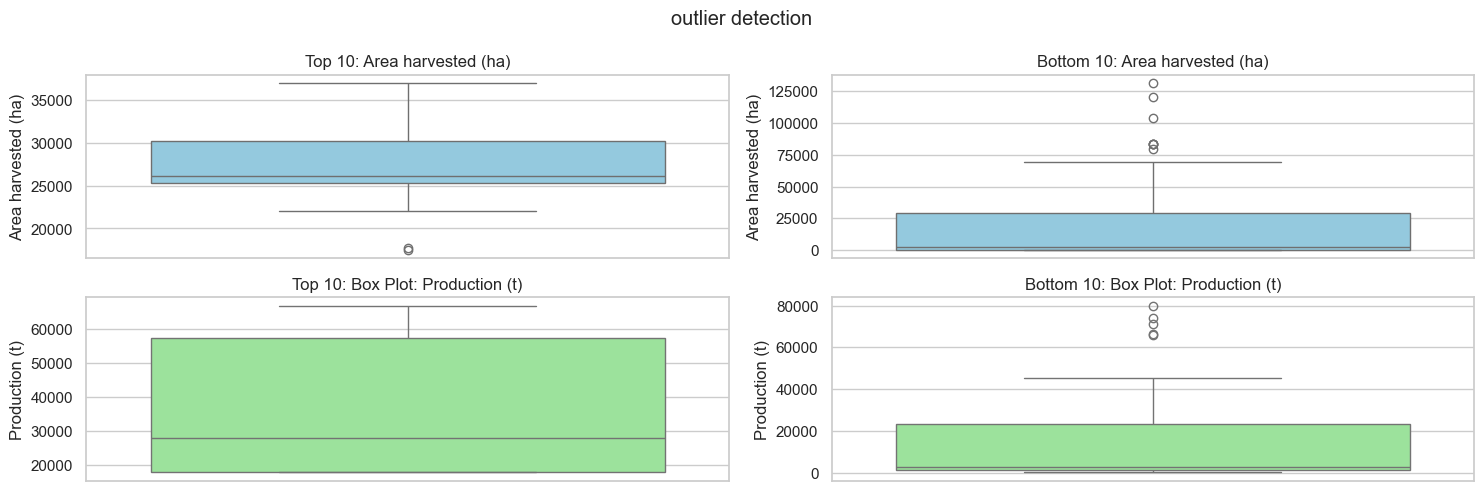

In [ ]:
# Create box plots
plt.figure(figsize=(15, 5))

# Boxplot for first 10 values of Area harvested
plt.subplot(2, 2, 1)
sns.boxplot(y=cpp_outliers["Area harvested (ha)"].head(20), color="skyblue")
plt.title("Top 10: Area harvested (ha)")

# Boxplot for last 10 values of Area harvested
plt.subplot(2, 2, 2)
sns.boxplot(y=cpp_outliers["Area harvested (ha)"].tail(39), color="skyblue")
plt.title("Bottom 10: Area harvested (ha)")

# Boxplot for Production
plt.subplot(2, 2, 3)
sns.boxplot(y=cpp_outliers["Production (t)"].head(10), color="lightgreen")
plt.title("Top 10: Box Plot: Production (t)")

# Boxplot for Production
plt.subplot(2, 2, 4)
sns.boxplot(y=cpp_outliers["Production (t)"].tail(60), color="lightgreen")
plt.title("Bottom 10: Box Plot: Production (t)")

plt.suptitle("outlier detection")
plt.tight_layout()
plt.show()


In [16]:
cpp.describe()

Year  Area harvested (ha)  Yield (kg/ha)  Production (t)
count  92422.000000         9.242200e+04   92422.000000    9.242200e+04
mean    2020.935470         9.022006e+04    9892.250255    7.547204e+05
std        1.387275         1.032879e+06   21593.628153    9.335728e+06
min     2019.000000         0.000000e+00       0.000000    0.000000e+00
25%     2020.000000         2.620000e+03    4508.275000    1.160753e+03
50%     2021.000000         3.005000e+03    5463.800000    1.042758e+04
75%     2022.000000         3.459750e+03    6490.575000    7.063798e+04
max     2023.000000         4.783200e+07  705196.700000    7.825858e+08